In [67]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [68]:
import_india=pd.read_csv('2018-2010_import.csv')
export_india=pd.read_csv('2018-2010_export.csv')


In [69]:
country_list=list(import_india.country.unique())

In [70]:
country_group=import_india.groupby('country')
ls=[]
for country_name in country_list:
    ls.append([country_name, country_group.get_group(str(country_name)).value.sum() ])

total = pd.DataFrame(ls, columns = ['country', 'total_imports']) 

In [71]:
total.loc[total.total_imports==0]

,country,total_imports
241,CHANNEL IS,0.0


Text(0.5, 1.0, 'LARGEST IMPORTERS TO INDIA 2010-2018')

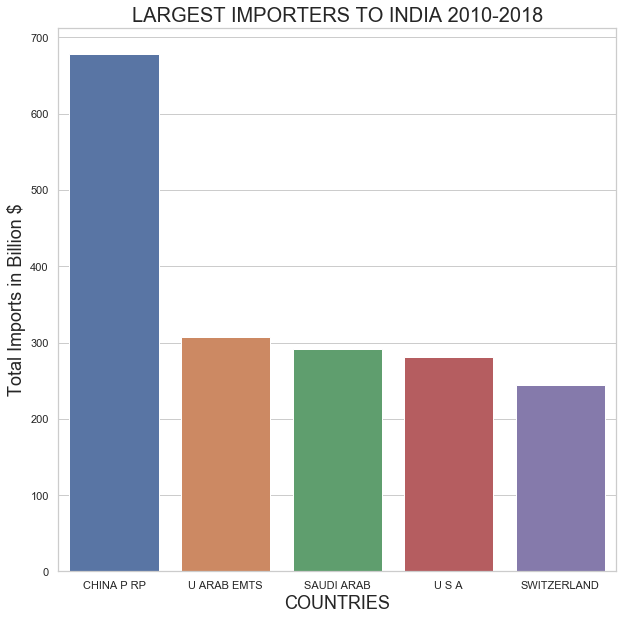

In [72]:
largest_importers_dataframe=total.nlargest(5,['total_imports'])
largest_importers_dataframe['total_imports']=largest_importers_dataframe['total_imports']/1000 

plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
largest_importers_bar=sns.barplot(x=largest_importers_dataframe['country'],y=largest_importers_dataframe['total_imports'])
plt.xlabel('COUNTRIES',size=18)
plt.ylabel('Total Imports in Billion $',size=18)
plt.title('LARGEST IMPORTERS TO INDIA 2010-2018',SIZE=20)

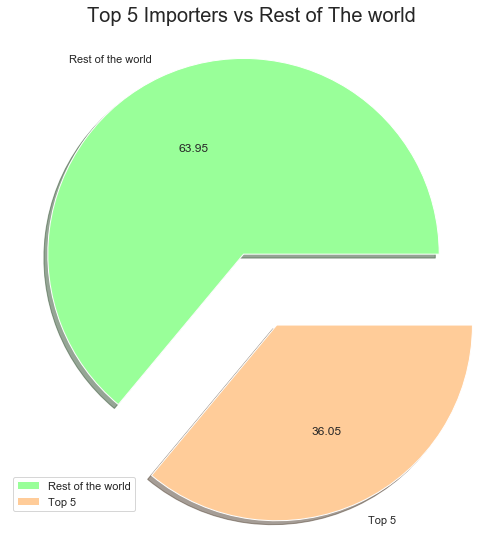

In [73]:
top_5_importers_sum=largest_importers_dataframe.total_imports.sum() 

rest_of_the_world=total.sort_values('total_imports',ascending=False)[5:].total_imports.sum()/1000 

labels=['Rest of the world','Top 5']

colors = ['#99ff99','#ffcc99']

sizes=[rest_of_the_world,top_5_importers_sum]

explode = [ 0.1, 0.3]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True,autopct='%1.2f')
plt.title('Top 5 Importers vs Rest of The world', fontsize = 20)
plt.legend()
plt.show()

In [74]:
total.nlargest(5,['total_imports'])

,country,total_imports
42,CHINA P RP,678877.15
215,U ARAB EMTS,307810.15
176,SAUDI ARAB,292104.09
217,U S A,281436.58
199,SWITZERLAND,243739.33


Text(0.5, 1.0, 'TRADE TRENDS')

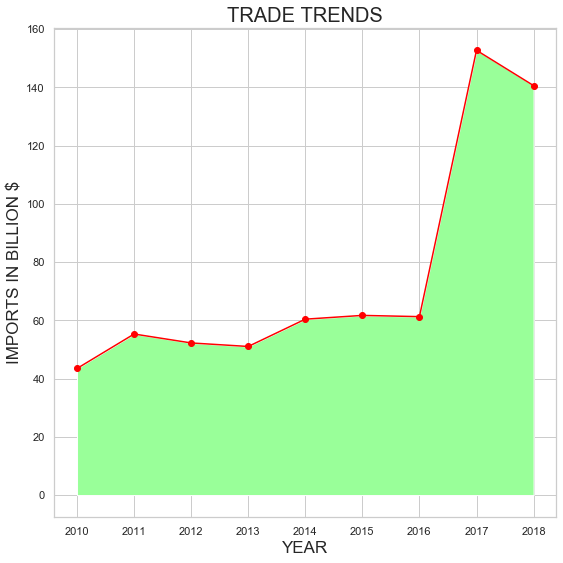

In [75]:
china=country_group.get_group('CHINA P RP')
imports_per_year_china=[]

for i in list(china['year'].unique())[::-1]:
    imports_per_year_china.append(china.sort_values('year').loc[china.year==i].value.sum()/1000)

year_china=list(china['year'].unique())[::-1]


plt.plot(year_china,imports_per_year_china,alpha=1,color='red',marker='o')

plt.xlabel('YEAR',size=17)
plt.ylabel('IMPORTS IN BILLION $',size=17)
plt.fill_between(year_china,imports_per_year_china,facecolor='#99ff99')
plt.title('TRADE TRENDS',size=20)

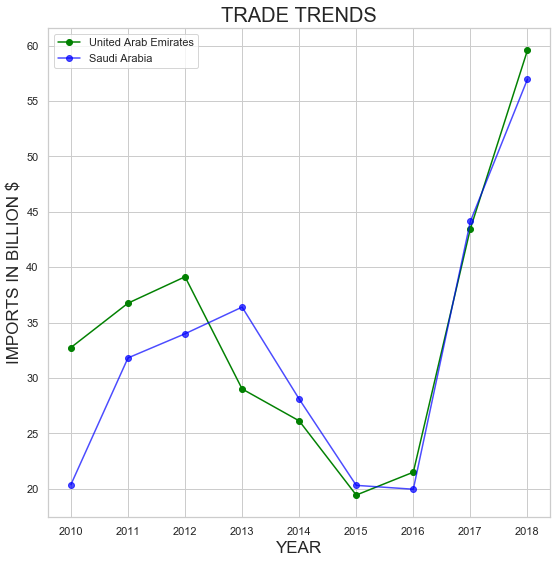

In [76]:
fig, ax = plt.subplots()

UAE=country_group.get_group('U ARAB EMTS')
imports_per_year_uae=[]

for i in list(UAE['year'].unique())[::-1]:
    imports_per_year_uae.append(UAE.sort_values('year').loc[UAE.year==i].value.sum()/1000)

year_uae=list(UAE['year'].unique())[::-1]



saudi=country_group.get_group('SAUDI ARAB')
imports_per_year_saudi=[]

for i in list(saudi['year'].unique())[::-1]:
    imports_per_year_saudi.append(saudi.sort_values('year').loc[saudi.year==i].value.sum()/1000)

year_saudi=list(saudi['year'].unique())[::-1]


uae_line, = ax.plot(year_uae,imports_per_year_uae,alpha=0.99,color='green',marker='o',label='United Arab Emirates')

saudi_line, = ax.plot(year_saudi,imports_per_year_saudi,alpha=0.7,color='blue',marker='o',label='Saudi Arabia')

plt.xlabel('YEAR',size=17)
plt.ylabel('IMPORTS IN BILLION $',size=17)
plt.title('TRADE TRENDS',size=20)


ax.legend()
plt.show()

    HScode  Total_value                                               Name
83      85    211.33310  ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...
82      84    122.97280  NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...
28      29     67.96859                                  ORGANIC CHEMICALS
30      31     22.96295                                       FERTILISERS.
38      39     19.79427                      PLASTIC AND ARTICLES THEREOF.


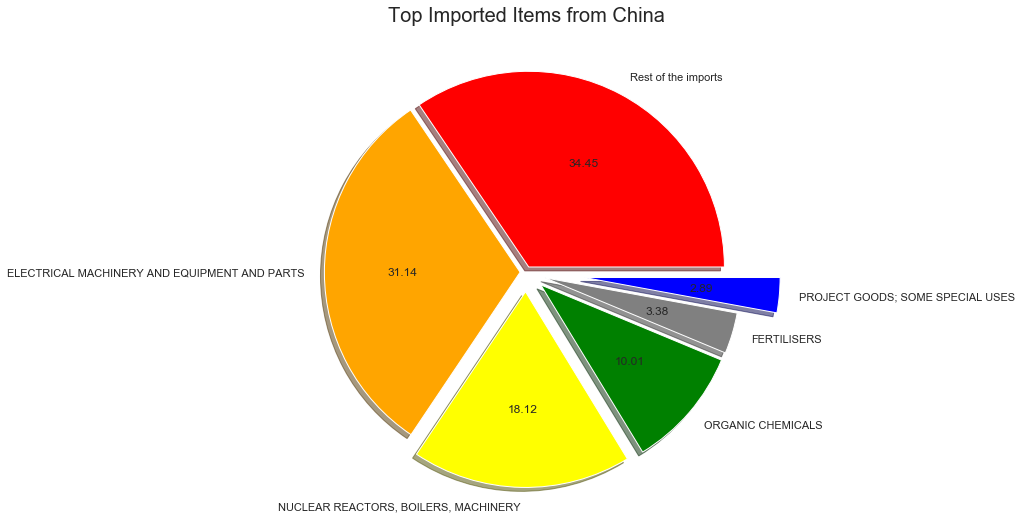

In [77]:
china_detail=country_group.get_group('CHINA P RP')

c=china_detail.groupby('HSCode')

item_value_china=[]

for item in list(set(china_detail.HSCode)):
    item_value_china.append([item,
                             round(c.get_group(item).value.sum()/1000,5),
                             list(china_detail.loc[china_detail.HSCode==item].Commodity)[0]]),
          
df_china = pd.DataFrame(item_value_china, columns = ['HScode','Total_value', 'Name'])      

print(df_china.sort_values('Total_value',ascending=False)[:5])
df_china=df_china.sort_values('Total_value',ascending=False)

rest_of_the_imports_china=df_china.sort_values('Total_value',ascending=False)[5:].Total_value.sum() 

labels=['Rest of the imports','ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS','NUCLEAR REACTORS, BOILERS, MACHINERY'
,'ORGANIC CHEMICALS','FERTILISERS','PROJECT GOODS; SOME SPECIAL USES']

colors = ['red','orange','yellow','green','grey','blue']

sizes=[rest_of_the_imports_china,df_china.Total_value[83],df_china.Total_value[82],df_china.Total_value[28],df_china.Total_value[30],df_china.Total_value[96]]


explode = [ 0.03, 0.03,0.1,0.1,0.1,0.3]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True,autopct='%1.2f')
plt.title('Top Imported Items from China', fontsize = 20)
plt.show()


In [78]:
export_india.head()
export_india.dtypes
export_india.isnull().sum()

HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64

In [79]:
export_india.dropna(inplace=True)
export_india.drop_duplicates(keep="first",inplace=True)

In [80]:
country_export_list=list(export_india.country.unique())

In [81]:
export_india.loc[export_india.country=='UNSPECIFIED']

,HSCode,Commodity,value,country,year
15152,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,0.00,UNSPECIFIED,2018
15153,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,0.07,UNSPECIFIED,2018
15156,15,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,0.03,UNSPECIFIED,2018
15157,19,"PREPARATIONS OF CEREALS, FLOUR, STARCH OR MILK...",0.02,UNSPECIFIED,2018
15159,22,"BEVERAGES, SPIRITS AND VINEGAR.",0.00,UNSPECIFIED,2018
15160,24,TOBACCO AND MANUFACTURED TOBACCO SUBSTITUTES.,0.04,UNSPECIFIED,2018
15161,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",2728.09,UNSPECIFIED,2018
15162,28,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,0.00,UNSPECIFIED,2018
15163,29,ORGANIC CHEMICALS,1.97,UNSPECIFIED,2018
15165,32,TANNING OR DYEING EXTRACTS; TANNINS AND THEIR ...,0.02,UNSPECIFIED,2018


In [82]:
country_export_group=export_india.groupby('country')
ls=[]
for country_name in country_export_list:
    ls.append([country_name, country_export_group.get_group(str(country_name)).value.sum() ])

total_exports = pd.DataFrame(ls, columns = ['country', 'total_exports'])
total_exports.loc[total_exports.total_exports==0]

,country,total_exports
235,JERSEY,0.0


Text(0.5, 1.0, 'LARGEST EXPORTERS OF INDIA 2010-2018')

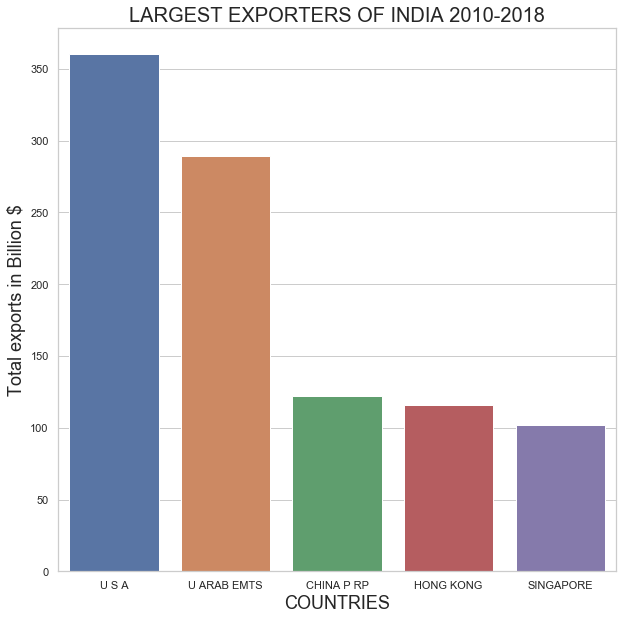

In [83]:
largest_exporters_dataframe=total_exports.nlargest(5,['total_exports'])
largest_exporters_dataframe['total_exports']=largest_exporters_dataframe['total_exports']/1000

plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
largest_exporters_bar=sns.barplot(x=largest_exporters_dataframe['country'],y=largest_exporters_dataframe['total_exports'])
plt.xlabel('COUNTRIES',size=18)
plt.ylabel('Total exports in Billion $',size=18)
plt.title('LARGEST EXPORTERS OF INDIA 2010-2018',SIZE=20)

    HScode  Total_value                                               Name
70      71     74.00262  NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...
29      30     34.85628                            PHARMACEUTICAL PRODUCTS
26      27     20.82249  MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...
62      63     18.99117  OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLO...
82      84     18.88594  NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...


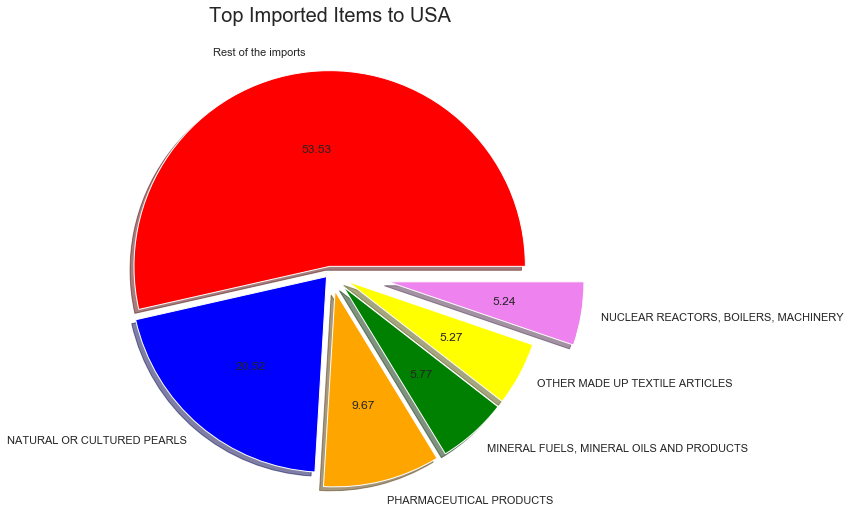

In [84]:
usa_detail=country_export_group.get_group('U S A')

u=usa_detail.groupby('HSCode')

item_value_usa=[]

for item in list(set(usa_detail.HSCode)):
    item_value_usa.append([item,
                             round(u.get_group(item).value.sum()/1000,5),
                             list(usa_detail.loc[usa_detail.HSCode==item].Commodity)[0]]),
          
df_usa = pd.DataFrame(item_value_usa, columns = ['HScode','Total_value', 'Name'])      

print(df_usa.sort_values('Total_value',ascending=False)[:5])
df_usa=df_usa.sort_values('Total_value',ascending=False)

rest_of_the_imports_usa=df_usa.sort_values('Total_value',ascending=False)[5:].Total_value.sum() 

labels=['Rest of the imports','NATURAL OR CULTURED PEARLS','PHARMACEUTICAL PRODUCTS'
,'MINERAL FUELS, MINERAL OILS AND PRODUCTS','OTHER MADE UP TEXTILE ARTICLES','NUCLEAR REACTORS, BOILERS, MACHINERY']

colors = ['red','blue','orange','green','yellow','violet']

sizes=[rest_of_the_imports_usa,df_usa.Total_value[70],df_usa.Total_value[29],df_usa.Total_value[26],df_usa.Total_value[62],df_usa.Total_value[82]]

explode = [ 0.03, 0.03,0.1,0.1,0.1,0.3]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True,autopct='%1.2f')
plt.title('Top Imported Items to USA', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'YEARS')

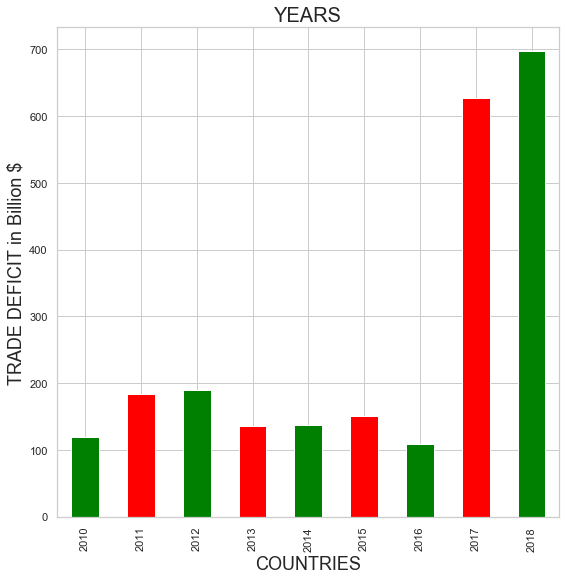

In [85]:
total_imports_per_year=import_india.groupby('year').agg({'value':'sum'})
total_exports_per_year=export_india.groupby('year').agg({'value':'sum'})
trade_deficit=[round(list(total_imports_per_year.value/1000)[i]-list(total_exports_per_year.value/1000)[i],2) for i in range(len(total_exports_per_year.index))]

trade_deficit=pd.Series(trade_deficit,index=total_exports_per_year.index)
sns.set_style('whitegrid')
trade_deficit.plot(kind='bar',color=['green','red'])
plt.xlabel('COUNTRIES',size=18)
plt.ylabel('TRADE DEFICIT in Billion $',size=18)
plt.title('YEARS',SIZE=20)

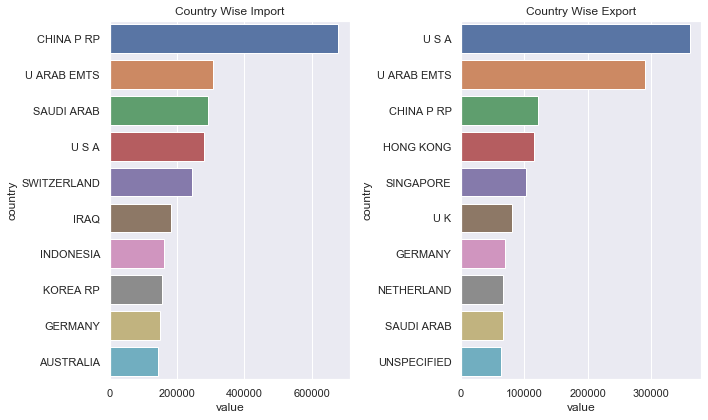

In [86]:
df5 = import_india.groupby('country').agg({'value':'sum'})
df5 = df5.sort_values(by='value', ascending = False)
df5 = df5[:10]

df6 = export_india.groupby('country').agg({'value':'sum'})
df6 = df6.sort_values(by='value', ascending = False)
df6 = df6[:10]
sns.set(rc={'figure.figsize':(10,6)})
ax1 = plt.subplot(121)

sns.barplot(df5.value,df5.index).set_title('Country Wise Import')

ax2 = plt.subplot(122)
sns.barplot(df6.value,df6.index).set_title('Country Wise Export')
plt.tight_layout()
plt.show()

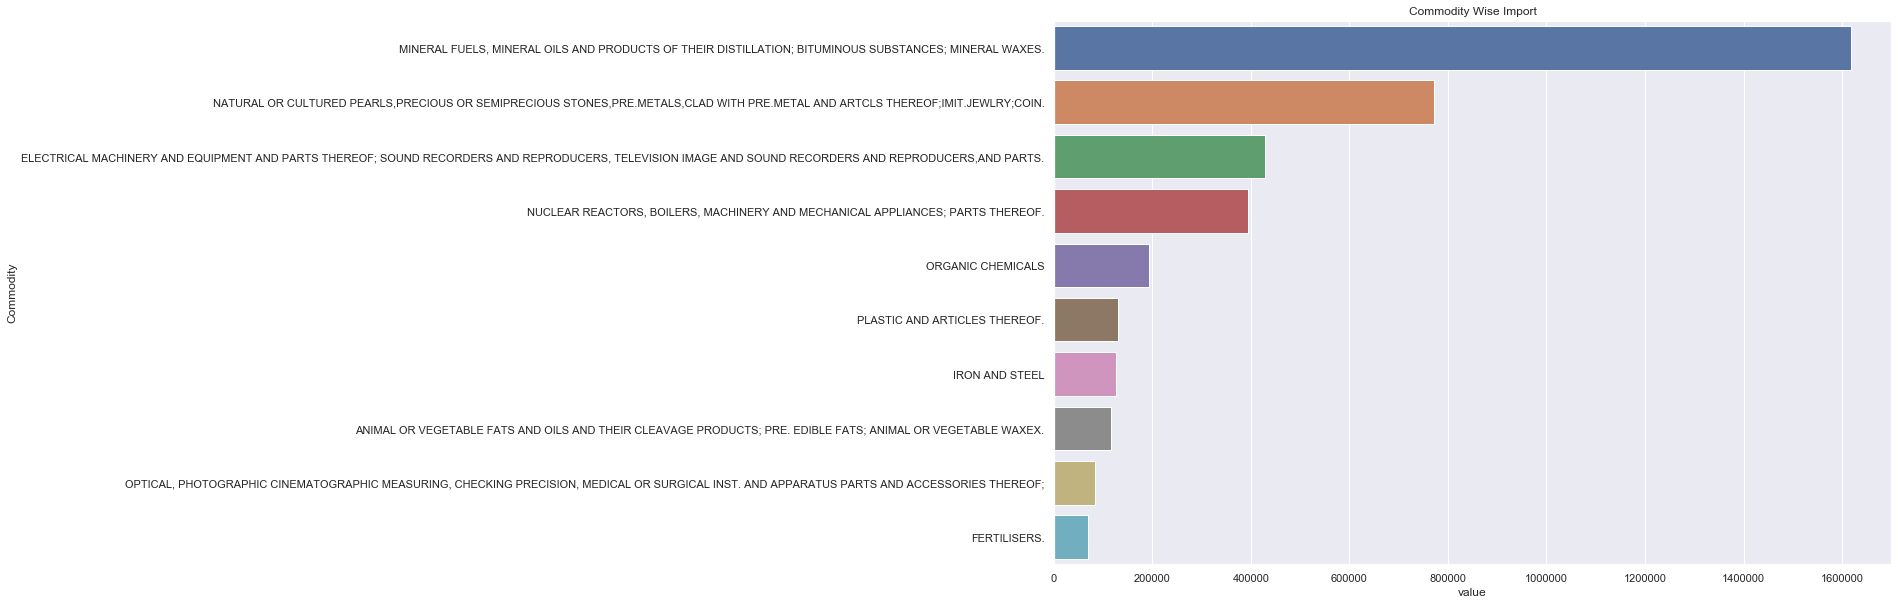

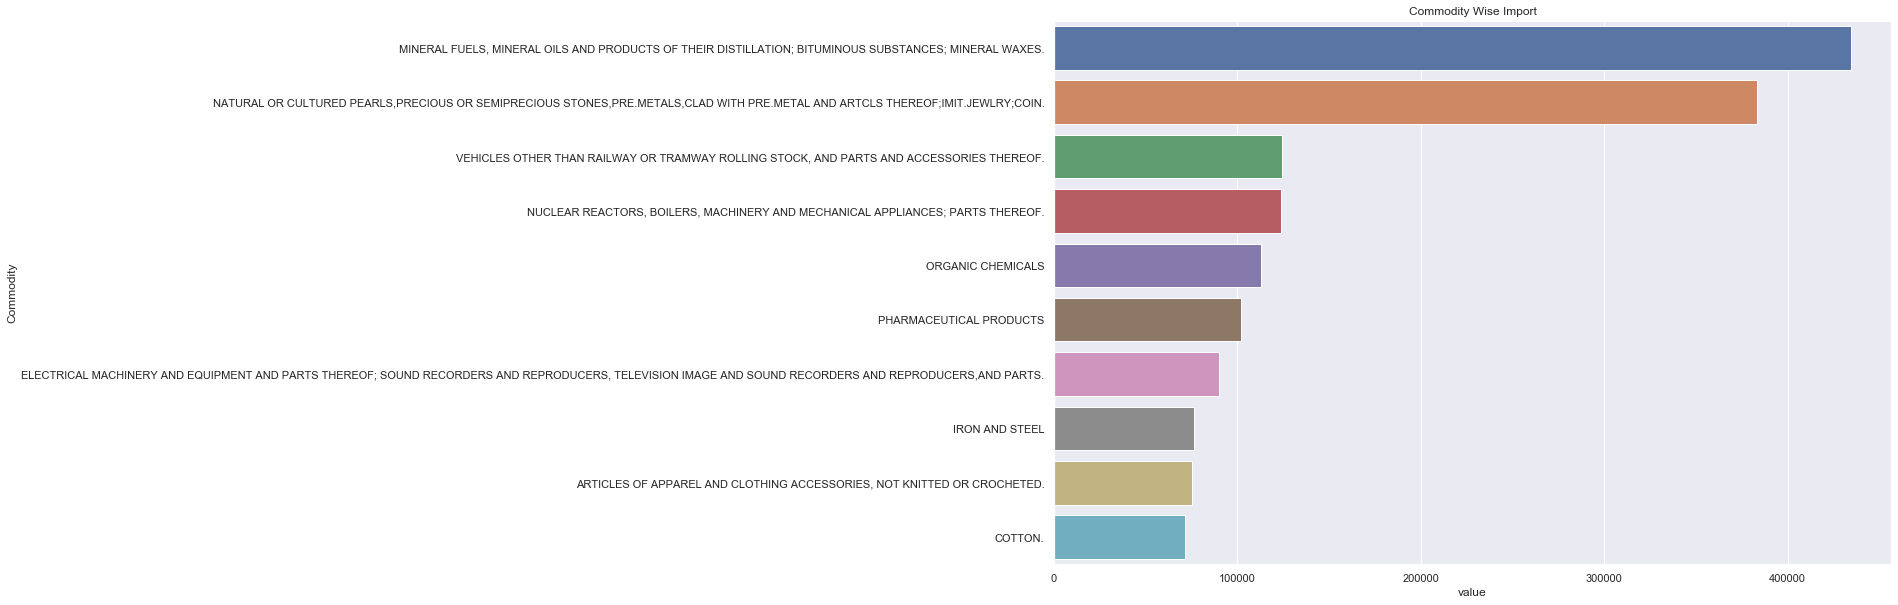

In [87]:
df3 = import_india.groupby('Commodity').agg({'value':'sum'})
df3 = df3.sort_values(by='value', ascending = False)
df3 = df3[:10]

df4 = export_india.groupby('Commodity').agg({'value':'sum'})
df4 = df4.sort_values(by='value', ascending = False)
df4 = df4[:10]
sns.set(rc={'figure.figsize':(15,10)})

sns.barplot(df3.value,df3.index).set_title('Commodity Wise Import')
plt.show()

sns.barplot(df4.value,df4.index).set_title('Commodity Wise Import')
plt.show()


In [88]:
expensive_import = import_india[import_india.value>1000]
expensive_import.head(10)

,HSCode,Commodity,value,country,year
55,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1559.37,ALGERIA,2018
95,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",4012.00,ANGOLA,2018
142,15,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,1720.46,ARGENTINA,2018
236,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",9664.58,AUSTRALIA,2018
701,71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",6619.68,BELGIUM,2018
942,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1596.79,BRAZIL,2018
1215,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1165.81,CANADA,2018
1414,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1047.32,CHINA P RP,2018
1415,28,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,1050.23,CHINA P RP,2018
1416,29,ORGANIC CHEMICALS,8596.25,CHINA P RP,2018


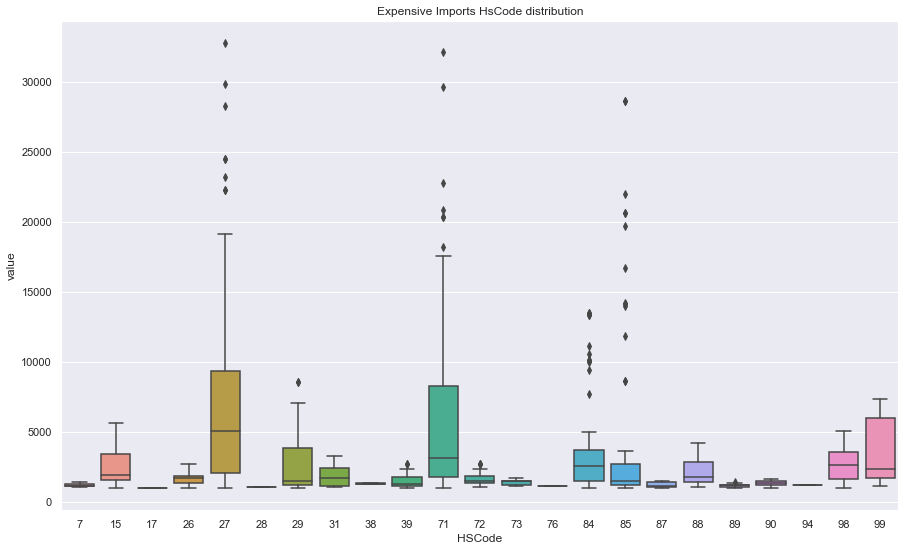

In [89]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(x="HSCode", y="value", data=expensive_import).set_title('Expensive Imports HsCode distribution')
plt.show()